# Assignment 9: Multiple regression

### Learning Outcomes
This assignment introduces you to multiple regression analysis, model comparision between different multiple regression models and bootstrap for regression models. 
### Data set 
An investigator is interested in understanding the relationship, if any, between the analytical skills of young gifted children and the following variables: father’s IQ, mother’s IQ, age in month when the child first said ‘mummy’ or ‘daddy’, age in month when the child first counted to 10 successfully, average number of hours per week the child’s mother or father reads to the child, average number of hours per week the child watched an educational program on TV during the past three months, average number of hours per week the child watched cartoons on TV during the past three months. 

The analytical skills are evaluated using a standard testing procedure, and the score on this test is used as the response variable. Data were collected from schools in a large city on a set of thirty-six children who were identified as gifted children soon after they reached the age of four.
 
The data frame stored in gifted.csv contains the variables: 
- score:       Score in test of analytical skills.
- fatheriq:    Father’s IQ.
- motheriq:  Mother’s IQ.
- speak:       Age in months when the child first said ‘mummy’ or ‘daddy’.
- count:       Age in months when the child first counted to 10 successfully.
- read:         Average number of hours per week the child’s mother or father reads to the child.
- edutv:       Average number of hours per week the child watched an educational program on TV during the past three months.
- cartoons:  Average number of hours per week the child watched cartoons on TV during the past three months.

### Preliminaries
Set up the environment by importing pandas, numpy, and matplotlib, scipy.optimize. This is already done in the preliminaries. Ensure that you have fully mastered and understood HW7 before starting the assignment. 


In [1]:
import matplotlib.pyplot as plt 
import scipy.optimize as so
import pandas as pd 
import numpy as np

df = pd.read_csv("gifted.csv")
df

,score,fatheriq,motheriq,speak,count,read,edutv,cartoons
0,159,115,117,18,26,1.9,3.00,2.00
1,164,117,113,20,37,2.5,1.75,3.25
2,154,115,118,20,32,2.2,2.75,2.50
3,157,113,131,12,24,1.7,2.75,2.25
4,156,110,109,17,34,2.2,2.25,2.50
5,150,113,109,13,28,1.9,1.25,3.75
6,155,118,119,19,24,1.8,2.00,3.00
7,161,117,120,18,32,2.3,2.25,2.50
8,163,111,128,22,28,2.1,1.00,4.00
9,162,122,120,18,27,2.1,2.25,2.75


## Task 1: Implementing multiple regression ( / 28 pts)
### Question 1.1 ( / 6 pts)
Implement the function multRegPredict(b,D,xname). 
  - b is a list of parameter, with the first one being the intercept 
  - D is a DataFrame that contains the regressors
  - xname is a list of column names in D that will be added as regressors 

b needs to contain one more parameter (the intercept) than the numbers of regressors in xname. It will be helpful to start from the corresponding functions from last homework for polynomial regression. 

Then make a scatterplot of D.read and D.score 
Call your new function with yp = multRegPredict([134,11.8], D,['read']) and add predicted values to your plot (just call plt.scatter again – the dots will be added in a different color).  

In [2]:
def multiRegPredict(b, df, xname):

    ## the intercept is the first element of the parameter array multiplied by 1.
    yp = np.ones(len(df.index)) * b[0]

    for i in range(len(xname)):
        xcurrent = df[xname[i]]
        yp = yp + b[i+1]*xcurrent # Add each regression value 

    return yp

Text(0, 0.5, 'Score')

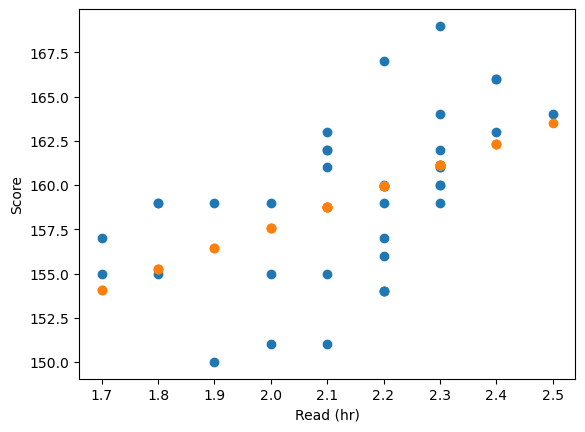

In [3]:
plt.scatter(df["read"], df["score"])
yp = multiRegPredict([134,11.8], df,['read'])
plt.scatter(df["read"], yp)
plt.xlabel('Read (hr)')
plt.ylabel('Score')

Figure 1. Blue dots are representative of average number of hours per week the child’s mother or father reads to the child vs score in test of analytical skills. Orange dots are the predicted values.

### Question 1.2 ( / 10 pts)
Implement the function multRegLossRSS(b,D,y,xname). y is a list or np-array for the response variable. The function should get the predictions from multRegPredict, and then calculate the residual sum-of-squares, and the derivative of the loss function in respect to each parameter. Test the function by calling multRegLossRSS([134,11.8],D,D.score,['read']). Report the resulting RSS for the regression of score (response variable) against read (explanatory variable)- as well as the derivatives for each parameter. Written answer: From the value of the derivative, do you have to increase or decrease the slope parameter to get a better fit?

In [4]:
def multiRegLossRSS(b, df, y, xname):
    # 1. calculate the residuals
    yp = multiRegPredict(b, df, xname)

    res = y - yp
    res2 = res ** 2
    RSS = sum(res2)
    
    
        # 1. initialize the derivative array
    deriv = np.zeros(len(b))
    #print(deriv)

    ## the first element will be the derivative in respect to the intercept
    deriv[0] = -2*sum(res)
    
    # 2. build up the array using a for loop 
    for i in range(0, len(xname)):
        deriv[i+1] = -2*np.sum(df[xname[i]]*res)
    
    return RSS, deriv

RSS, deriv = multiRegLossRSS([134,11.8], df, df["score"], ["read"])
print('The RSS value is %f' % RSS)
print('The derivative values are ', deriv)

The RSS value is 543.510000
The derivative values are  [ 4.84 10.3 ]


Written: Based on the value of the derivitive the slope would need to decrease as it is positive 

### Question 1.3 ( / 12 pts)
Implement the function multRegFit(D,y,xname), which uses so.minimize and multRegLossRSS to estimate the parameter values, and then calls multRegLossRSS again to calculate the R2 of the fit. The function should then return the R2 values and regression coefficients b. Use this print on the screen the R2-values for the models:

- y = b0  (hint, set xname = [])
- y = b0 + b1 \* read 
- y = b0 + b1 \* motheriq 
- y = b0 + b1 \* motheriq + b2 \* read

Which model has the highest R2? How do you interpret these results? How much of the variance of the response variable is uniquely explained by reading, how much by motheriq? Do the two variables explain each other away, explain independent parts of the variance, or show suppression? 

In [5]:
def multiRegFit(df, y, xname):
    b0 = np.zeros(len(xname)+1)
    
    result = so.minimize(multiRegLossRSS, b0, args=(df, y, xname), jac=True)
    
    b = result.x
    
    TSS = sum((y - np.mean(y))**2)

    RSS, deriv = multiRegLossRSS(b,df,y,xname)
    R2 = 1 - RSS/TSS 

    return R2, b


In [6]:
xnames = ["read", "motheriq"]
print("y = b0")
print(multiRegFit(df, df["score"], []))
print("\ny = b0 + b1 * read")
print(multiRegFit(df, df["score"], [xnames[0]]))
print("\ny = b0 + b1 * motheriq")
print(multiRegFit(df, df["score"], [xnames[1]]))
print("\ny = b0 + b1 * motheriq + b2 * read")
print(multiRegFit(df, df["score"], xnames))


y = b0
(3.3306690738754696e-16, array([159.13888889]))

y = b0 + b1 * read
(0.2758322729769085, array([133.9048511 ,  11.81307361]))

y = b0 + b1 * motheriq
(0.3263173772377881, array([111.09295521,   0.40659464]))

y = b0 + b1 * motheriq + b2 * read
(0.6291342380411372, array([82.63542504, 12.38890287,  0.42346452]))


Written: The model with the highest R2 is the model that uses both motheriq and read. If you sum the R2 from read and motheriq you get ~0.6021. Which means that motheriq and read do not fit overlapping parts of the variance. The regression coefficients in the combined model also increase. The results show the influence of read is increased when considered in the context of motheriq. The two variables explain independent parts of the variance. 

## Task 2: Do crossvalidation on these models  ( / 32 pts)
### Question 2.1 ( / 12 pts)
Modify the leaveOneOutCV function from last homework, so it works on a data frame with the multiple regression analysis. The inputs to the function are:  

def leaveOneOutCV(D,y,args=(),fitfcn=multRegFit,predictfcn=multRegPredict):
 - D: Data Frame with explanatory variables 
 - y: A list or np-array of the response variable
 - args: Input arguments for the fitfcn and predict function (xname) 
 - fitfcn: Function for fitting called as fitfcn(D,y,args)
 - predictfcn: Function for prediction called as predictfcn(D,y,args)


In [7]:
def leaveOneOutCV(df, y, fitfnc = multiRegFit, predfnc = multiRegPredict, args =()):

    # first create an array that represent the index 
    ind = np.arange(len(df.index))

    N = len(df.index)

    yp_cv = np.zeros(N)

    # use np.array_split to generate indices for folds
    folds = np.array_split(ind, N)
    
    r,b0 = fitfnc(df, y, args)
    

    for f in np.arange(N): 
        folds_cp = folds.copy() # creating a copy of the folds array
        test_ind = folds[f] # get the indices for test set
        df_test  = df.loc[test_ind] # set one fold aside for testing


        del folds_cp[f]        # delete the test set indices
        train_ind = np.concatenate(folds_cp, axis = 0) # concatenate all the remaining indices into 1 array
        df_train  = df.loc[train_ind]
        ytrain = y.loc[train_ind]
        
        r,b = fitfnc(df_train, ytrain, args)
        yp_cv[test_ind] = predfnc(b, df_test, args)

    # TSS
    TSS = sum((y - y.mean())**2)

    # cross validated RSS
    RSScv = sum((y - yp_cv)**2)

    # cross validated R2
    R2cv = 1-RSScv/TSS

    # fit and predict
    yp = predfnc(b0, df, args)

    # 
    TSS = sum((y-y.mean())**2)
    RSS = sum((y-yp)**2)
    R2  = 1-RSS/TSS
    
    return R2cv, R2
    

### Question 2.2 ( / 8 pts)
Call the function to get the cross-validated $R^2$ for the 4 models specified in Task 1, Question 3. How to you interpret these results? Is there evidence that reading increases the analytic score over and above what the IQ of the mother does? 

In [8]:
print("Format is R2cv, R2")
print(leaveOneOutCV(df, df["score"], multiRegFit, multiRegPredict, []))
print(leaveOneOutCV(df, df["score"], multiRegFit, multiRegPredict, ["read"]))
print(leaveOneOutCV(df, df["score"], multiRegFit, multiRegPredict, ["motheriq"]))
print(leaveOneOutCV(df, df["score"], multiRegFit, multiRegPredict, ["read", "motheriq"]))

Format is R2cv, R2
(-0.05795918367345809, 3.3306690738754696e-16)
(0.2041976646172461, 0.2758322729769085)
(0.236467819730799, 0.3263173772377881)
(0.5760093388825653, 0.6291342380411372)


The sum of the individual cross validated fit by read and motheriq sum to be ~0.4407, which is lower than the combined score. This may suggest that both read and motheriq are independent predictors, but they also help emphasize the effects of the other. I would not say that there is evidence that reading increases the analytic score over what the IQ of the mother does. As based on the R2CV numbers mother IQ has a bigger effect than reading. 

### Question 2.3 ( / 4 pts)
Add the variable fatheriq to the model containing read and motheriq. Is there evidence that the IQ of the father improves the prediction over and above what hours reading and mother IQ can predict? 

In [9]:
print("R2cv = ", leaveOneOutCV(df, df["score"], multiRegFit, multiRegPredict, ["read", "motheriq", "fatheriq"])[0])

R2cv =  0.6326907014574836


The R2cv including father iq increases (0.57 to 0.63). This would suggest that the iq of the father improves the fit of the prediction. 

### Question 2.4 ( / 8 pts)
Is edutv (hours of educational TV) alone a reliable predictor of the analytic score? Does it add prediction power over and above from what the model motheriq + read + fatheriq can predict? 


In [10]:
print(leaveOneOutCV(df, df["score"], multiRegFit, multiRegPredict, ["edutv"]))

(0.037315563547507424, 0.1370922957313695)


In [11]:
print(leaveOneOutCV(df, df["score"], multiRegFit, multiRegPredict, ["read", "motheriq", "fatheriq", "edutv"]))

(0.620965949620955, 0.7002993395259496)


Edutv is not a reliable predictor of analytic score. It does not add predictive value. This can be seen as the R2cv value goes down from what is was having just read, motheriq, and fatheriq. 

## Task 3: Bootstrap for multiple regression. ( / 40 pts)
### Question 3.1 ( / 14 pts)
Implement bootstrap for linear regression. Start from the function bootstrap from Homework 3. The function should have input parameters

```
def bootstrapReg(D,y,args,fitfcn,numIter=500):
```
and should return a numIter x numParams np.array of bootstrap estimates.  

fitfcn is the function that will be used to get the parameter estimates.
numParams is the length of b-vector returned from the fitfcn (in our case multiRegFit). That is, each column of the array should be the boostrap estimates for one of the regression coefficients. 

Note: you will also have to use here the following functions (add them to your notebook): 
- confidenceInt from HW 3

Run the bootstrap on the data set in gifted.csv. Run the bootstrap on a simple regression model that explains ‘score’ from the explanatory variable ‘edutv’ alone. Report the CI for edutv -slope. Does the CI include zero - i.e. is there evidence that the relationship between edutv and score is not zero? Which direction is the association between the two variables? 

In [12]:
def confidenceInt(data, prec):
    bounds = []
    bounds.append(np.percentile(data, 100-prec))
    bounds.append(np.percentile(data, prec))
    
    return bounds

def bootstrap(df, y, fitfcn, numIter = 500, args=()):

    R2, b = fitfcn(df,y,args)

    numParam = len(b)
    
    N = len(df.index)
    ind = np.arange(N)

    stat = np.zeros((numIter, numParam))
    
    for i in range (0, numIter):
        sample = np.random.choice(ind, N, replace = True)
        
        r2, stat[i, :] = fitfcn(df.iloc[sample], y[sample], args)
        
    return stat

In [13]:
d = bootstrap(df, df["score"], multiRegFit, numIter = 500, args = ["edutv"])
confidenceInt(d[:,1], 95)

[-4.869053184489548, -0.9177597530916087]

The CI does not include 0 which means there is some relationship between the variabes. The direction of association of variables is negative. 

### Question 3.2 ( / 8 pts)
Run the bootstrap on the model that explains score as a function of hours of cartoons watched. Does the confidence interval for the slope between ‘cartoons’ and ‘score’ include zero? 

In [14]:
d = bootstrap(df, df["score"], multiRegFit, numIter = 500, args = ["cartoons"])
confidenceInt(d[:,1], 95)

[-0.33223631650251556, 3.533533599763236]

The confidence interval for score and hours of cartoons watched does include 0, which means it is possible for there to be no relationship between the variables. 

### Question 3.3 ( / 8 pts)
Run the bootstrap on a model that explains score as a function of edutv and cartoons. Report the CIs for both variabless. Do the conclusion from Question 1 and 2 change? Have the CIs become smaller or larger as compared to the simple regression models from Question 1 and 2?

In [15]:
A = bootstrap(df, df["score"], multiRegFit, numIter = 500, args = ["edutv", "cartoons"])

print("CI for edutv: ", confidenceInt(A[:,1], 95))

print("CI for cartoons: ",confidenceInt(A[:,2], 95))


CI for edutv:  [-13.209385320128288, -3.02563468096298]
CI for cartoons:  [-9.478907094712541, -0.6417639744767415]


The conclusions would change as neither include 0 and both are negative. The CI have become larger under the multiple regression, which makes sense as we should expect to have an increase in the variability of the estimates. 

### Question 3.4 ( / 10 pts)
Plot the bootstrap estimates for edutv and cartoons from Question 3 against each other in a scatter plot. Are they positively or negatively related? What does this mean for the relationship between the regressors?

Text(0, 0.5, 'Cartoons Slope')

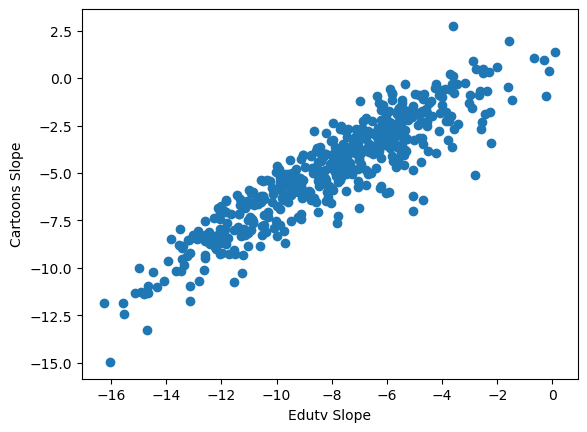

In [16]:
plt.scatter(A[:,1],A[:,2])
plt.xlabel('Edutv Slope')
plt.ylabel('Cartoons Slope')

Figure 2. Scatter plot of slopes between edutv and cartoons.

The slopes are positively related meaning the regressors are negatively correlated. Negatively correlated regressors lead to positive correlation of slope estimates and increase the variablility of the estimates. 